In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [5]:
folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_std/"
filename = "MAC000019.csv"
dataset = read_csv(folder + filename,parse_dates = ['tstp'], index_col = ['tstp'])

In [6]:
train = dataset[:33600]
test = dataset[33600:]

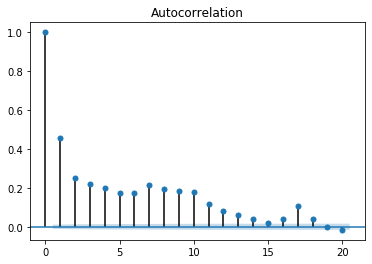

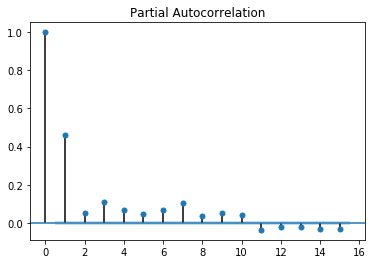

In [9]:
plot_acf(train['energy(kWh/hh)'],lags=20)
plt.show();
#q=10
plot_pacf(train['energy(kWh/hh)'],lags=15)
plt.show();
# p = 2

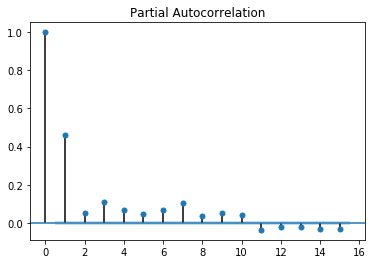

In [8]:
plot_pacf(train['energy(kWh/hh)'],lags=15)
plt.show();

# p = 2

In [64]:
arima_model = ARIMA(train,order = (2,0,0)).fit()
# p,d,q

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [65]:
print(arima_model.summary())

                              ARMA Model Results                              
Dep. Variable:         energy(kWh/hh)   No. Observations:                33600
Model:                     ARMA(2, 0)   Log Likelihood               25838.324
Method:                       css-mle   S.D. of innovations              0.112
Date:                Tue, 21 Apr 2020   AIC                         -51668.648
Time:                        19:56:22   BIC                         -51634.959
Sample:                             0   HQIC                        -51657.897
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1256      0.001    105.560      0.000       0.123       0.128
ar.L1.energy(kWh/hh)     0.4351      0.005     79.861      0.000       0.424       0.446
ar.L2.energy

In [66]:
ARIMA_prediction = arima_model.predict(start=33600, end =35087,typ= 'levels')

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [67]:
actual = read_csv(folder + filename)
actual = actual["energy(kWh/hh)"].to_list()
y_test = actual[33600:]

In [68]:
y_pred = ARIMA_prediction.to_list()

In [69]:
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(y_test,y_pred))

0.08390845774759083


In [70]:
import numpy as np
def sMAPE(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(100*2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()

In [71]:
sMAPE(y_test,y_pred)

50.624065585651834